# 13. Volatility and IR Options

## Overview

* The most liquid nonlinear OCT rates products are SOFR caps, floors and SOFR swaptions
* This chapter is an overview of SOFR caps, floors and swaptions, and their pricing and heding

## Sell Side Rates Options Business

* In the rates options business, there are exotic products and vanilla products
    * Vanilla products: SOFR caps, floors and SOFR swaptions
    * Examples of exotics: Bermudan swaptions, CMS swaps, CMS caps and floors, CMS spread options, range accrual
* Exotic desk traders hedge their books by trading vanilla products
* Vanilla desk traders do so by trading underlying linear products (SOFR swaps, FRA or futures)
* More complicated models are needed for exotics pricing and hedging
    * Since exotics are hedged by vanillas, the pricing model has to give consistent pricing of both exotics and vanillas
    * Thus, the models are calibrated to vanillas

## Sell Side Rates Options Business (Cont.)

* All risk hedged out, where is the revenue from?
    * Think of zero delta ladder, portfolio PnL will be zero no matter how the market moves
    * Traders can still intentionally over/under hedge, taking directional risk, but there is in house delta limit as regulator is watching
    * Part of the revenue is from fees and bid ask spreads
* The more exotic the product is, the higher the fees and bid ask spreads, and hence the revenue
    * Justified by the significant investment in a quant team of PhDs to build and maintain the model, the hardware, and limited market players
    * Only 4-5 banks have a working model to quote/trade all rates exotics
    * Even with a working model, sometimes trade from a client can be too risky for small banks to take in
    * The larger the book is, the more risk a bank can safely take

## Option Pricing Basic

* PV of an option can be computed by a no-arbitrage argument, like many examples we've seen so far
* But unlike previous no-arbitrage arguments, option pricing requires assumptions (models)
* The simpliest option pricing model is the Binomial Option Pricing Model (BOPM)

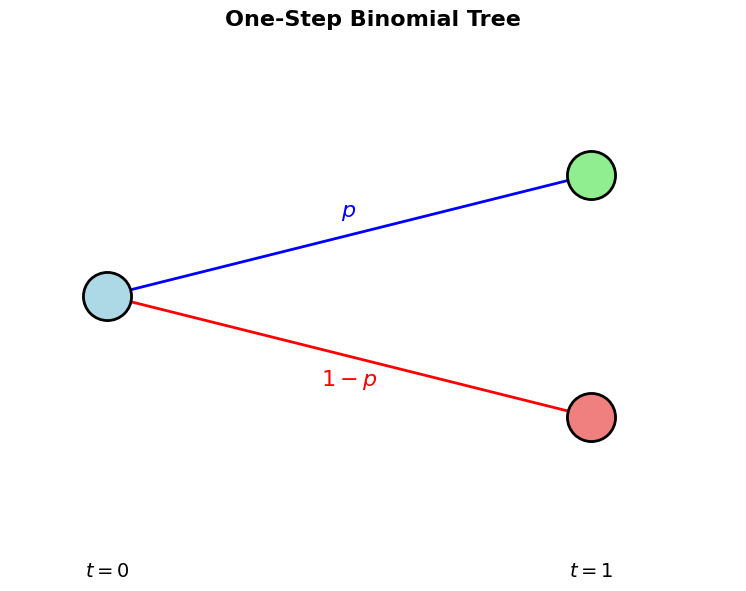

In [2]:
# Single-step binomial tree visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 6))

# Node positions
t0_x, t0_y = 0, 0.5
t1_u_x, t1_u_y = 1, 0.75
t1_d_x, t1_d_y = 1, 0.25

# Draw edges (branches)
ax.plot([t0_x, t1_u_x], [t0_y, t1_u_y], 'b-', lw=2, label='Up move')
ax.plot([t0_x, t1_d_x], [t0_y, t1_d_y], 'r-', lw=2, label='Down move')

# Draw nodes
node_size = 1200
ax.scatter([t0_x], [t0_y], s=node_size, c='lightblue', edgecolors='black', zorder=5, linewidths=2)
ax.scatter([t1_u_x], [t1_u_y], s=node_size, c='lightgreen', edgecolors='black', zorder=5, linewidths=2)
ax.scatter([t1_d_x], [t1_d_y], s=node_size, c='lightcoral', edgecolors='black', zorder=5, linewidths=2)

# Add labels
ax.text(t0_x, t0_y, r'$S$', fontsize=20, ha='center', va='center', fontweight='bold')
ax.text(t1_u_x, t1_u_y, r'$Su$', fontsize=20, ha='center', va='center', fontweight='bold')
ax.text(t1_d_x, t1_d_y, r'$Sd$', fontsize=20, ha='center', va='center', fontweight='bold')

# Add probability labels on branches
ax.text(0.5, 0.65, r'$p$', fontsize=16, ha='center', va='bottom', color='blue', style='italic')
ax.text(0.5, 0.35, r'$1-p$', fontsize=16, ha='center', va='top', color='red', style='italic')

# Time labels
ax.text(t0_x, -0.05, r'$t=0$', fontsize=14, ha='center', va='top')
ax.text(t1_u_x, -0.05, r'$t=1$', fontsize=14, ha='center', va='top')

# Formatting
ax.set_xlim(-0.2, 1.3)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('One-Step Binomial Tree', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

## BOPM

## SOFR Caps and Floors

* Consider a tenor structure
$$
T_0 < T_1 < T_2 < \cdots < T_N, \qquad \tau_n = T_{n+1} - T_n\quad \forall n=0, 1, 2, \ldots, N-1, 
$$
where $\tau_n$ is now fixed to be 3M
* A 3M SOFR cap with strike $K$ pays the buyer a series of cash flows
$$
\tau_n(L(T_{n+1}, T_{n}, T_{n+1}) - K)^+ \quad\text{ at }\quad T_{n+1}, \quad \forall n=0, 1, 2, \ldots, N-1, 
$$
where $L(T_{n+1}, T_{n}, T_{n+1})$ is the SOFR term rate
* Similarly, a 3M SOFR floor with strike $K$ pays the buyer a series of cash flows
$$
\tau_n(K - L(T_{n+1}, T_{n}, T_{n+1}))^+ \quad\text{ at }\quad T_{n+1} \quad \forall n=0, 1, 2, \ldots, N-1
$$

## Why the Name

* Imagine you have liabilities to pay floating coupon $\tau_n L(T_{n+1}, T_n, T_{n+1})$ every quarter (3M)
* The payment to be made is unknown until the end of every coupon period, $T_{n+1}$

* If you buy a cap with $K = 6\%$, when the term rate fixes to be lower than $6\%$, from the cap you recieve nothing: 
$$
\tau_n(L(T_{n+1}, T_n, T_{n+1}) - K)^+ = 0
$$
* Given the liability, you will pay a lower than $6\%$ coupon rate: $\tau_n L(T_{n+1}, T_n, T_{n+1})$

* But if the forward rate fixed to be larger than $6\%$, from the cap you recieve
$$
\tau_n(L(T_{n+1}, T_n, T_{n+1}) - K)^+ = \tau_n(L(T_{n+1}, T_n, T_{n+1}) - K)
$$
* Given the liability, you still pay a the coupon $\tau_n L(T_{n+1}, T_n, T_{n+1})$
* Overall you pay $\tau_n K$ which is at $6\%$ annual coupon rate
* If you buy a $6\%$ cap, your payment is capped at $6\%$ annual rate

## Why the Name -- Floor